<a href="https://colab.research.google.com/github/thihanaung-thnn/mathematics/blob/main/sampling_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.animation as animation
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# %matplotlib notebook
%matplotlib inline

In [2]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['font.family'] = 'monospace'
mpl.rcParams['ytick.labelleft'] = False
mpl.rcParams['ytick.left'] = False

### Define functions for preparation of data and for animation

In [3]:
def sampling(data):
    np.random.seed(123)
    bins = np.histogram(data,bins=100)[1]
    max_count = np.max(np.histogram(data, bins=100)[0])
    sample_10 = [np.mean(np.random.choice(data, size=10)) for _ in range(10000)]
    sample_100 = [np.mean(np.random.choice(data, size=100)) for _ in range(10000)]
    sample_1000 = [np.mean(np.random.choice(data, size=1000)) for _ in range(10000)]

    average_n = round(np.mean(data),3)
    sd_n = round(np.std(data),3)
    
    calc = {'max_count':max_count, 'data':data,'bins':bins, 'sample_10':sample_10, 'sample_100':sample_100,
           'sample_1000':sample_1000, 'average_n':average_n, 'sd_n':sd_n}
    
    return calc

# for saving animation videos
def plot(data, output_name):
    def update(curr):
        if curr == 90:
            a.event_source.stop()
        n = (curr+1)*10
        plt.cla()
        plt.subplot(2,2,1)
        plt.hist(data['data'], bins=data['bins'],color='green')
        plt.title(f"Population \nmean : {data['average_n']}, sd : {data['sd_n']}",fontsize=10)

        plt.subplot(2,2,2)
        plt.hist(data['sample_10'][:n], bins=data['bins'],color='blue')
        plt.title(f"sample size - 10 \nmean : {round(np.mean(data['sample_10'][:n]),3)}, sd : {round(np.std(data['sample_10'][:n]),3)}",fontsize=10)

        plt.ylim(0,340)

        plt.subplot(2,2,3)
        plt.hist(data['sample_100'][:n], bins=data['bins'],color='blue')
        plt.title(f"sample size - 100 \nmean : {round(np.mean(data['sample_100'][:n]),3)}, sd : {round(np.std(data['sample_100'][:n]),3)}",fontsize=10)
        plt.ylim(0,340)

        plt.subplot(2,2,4)
        plt.hist(data['sample_1000'][:n], bins=data['bins'],color='blue')
        plt.title(f"sample size - 1000 \nmean : {round(np.mean(data['sample_1000'][:n]),3)}, sd : {round(np.std(data['sample_1000'][:n]),3)}",fontsize=10)
        plt.ylim(0,800)
        plt.annotate(f"sampling times : {n}", [10,260])
        plt.tight_layout()
        
    fig = plt.figure()
    a = animation.FuncAnimation(fig, update, frames=90)
    
    writervideo = animation.FFMpegWriter(fps=3)
    a.save(output_name, writer=writervideo,dpi=150)
    
    
def plot_fig(data, title_name, loc):
    
    fig = plt.figure(figsize=(12,12),dpi=150)
    plt.subplot(2,2,1)
    plt.hist(data['data'], bins=data['bins'],color='green')
    plt.annotate(f"Population \nmean : {data['average_n']} \nsd : {data['sd_n']}",loc, fontsize=12)

    plt.subplot(2,2,2)
    plt.hist(data['sample_10'], bins=data['bins'],color='blue')
    plt.annotate(f"sample size - 10 \nmean : {round(np.mean(data['sample_10']),3)} \nsd : {round(np.std(data['sample_10']),3)} \nsampling times : {len(data['sample_10'])}", loc,fontsize=12)
    plt.ylim(0,data['max_count'])

    plt.subplot(2,2,3)
    plt.hist(data['sample_100'], bins=data['bins'],color='blue')
    plt.annotate(f"sample size - 100 \nmean : {round(np.mean(data['sample_100']),3)}, \nsd : {round(np.std(data['sample_100']),3)} \nsampling times : {len(data['sample_10'])}",loc,fontsize=12)
    plt.ylim(0,data['max_count'])

    plt.subplot(2,2,4)
    plt.hist(data['sample_1000'], bins=data['bins'],color='blue')
    plt.annotate(f"sample size - 1000 \nmean : {round(np.mean(data['sample_1000']),3)}, \nsd : {round(np.std(data['sample_1000']),3)} \nsampling times : {len(data['sample_10'])}",loc, fontsize=12)
    plt.ylim(0,data['max_count'])
    plt.tight_layout()
    plt.suptitle(title_name, fontsize=15, fontweight='bold')

### Normal Distribution

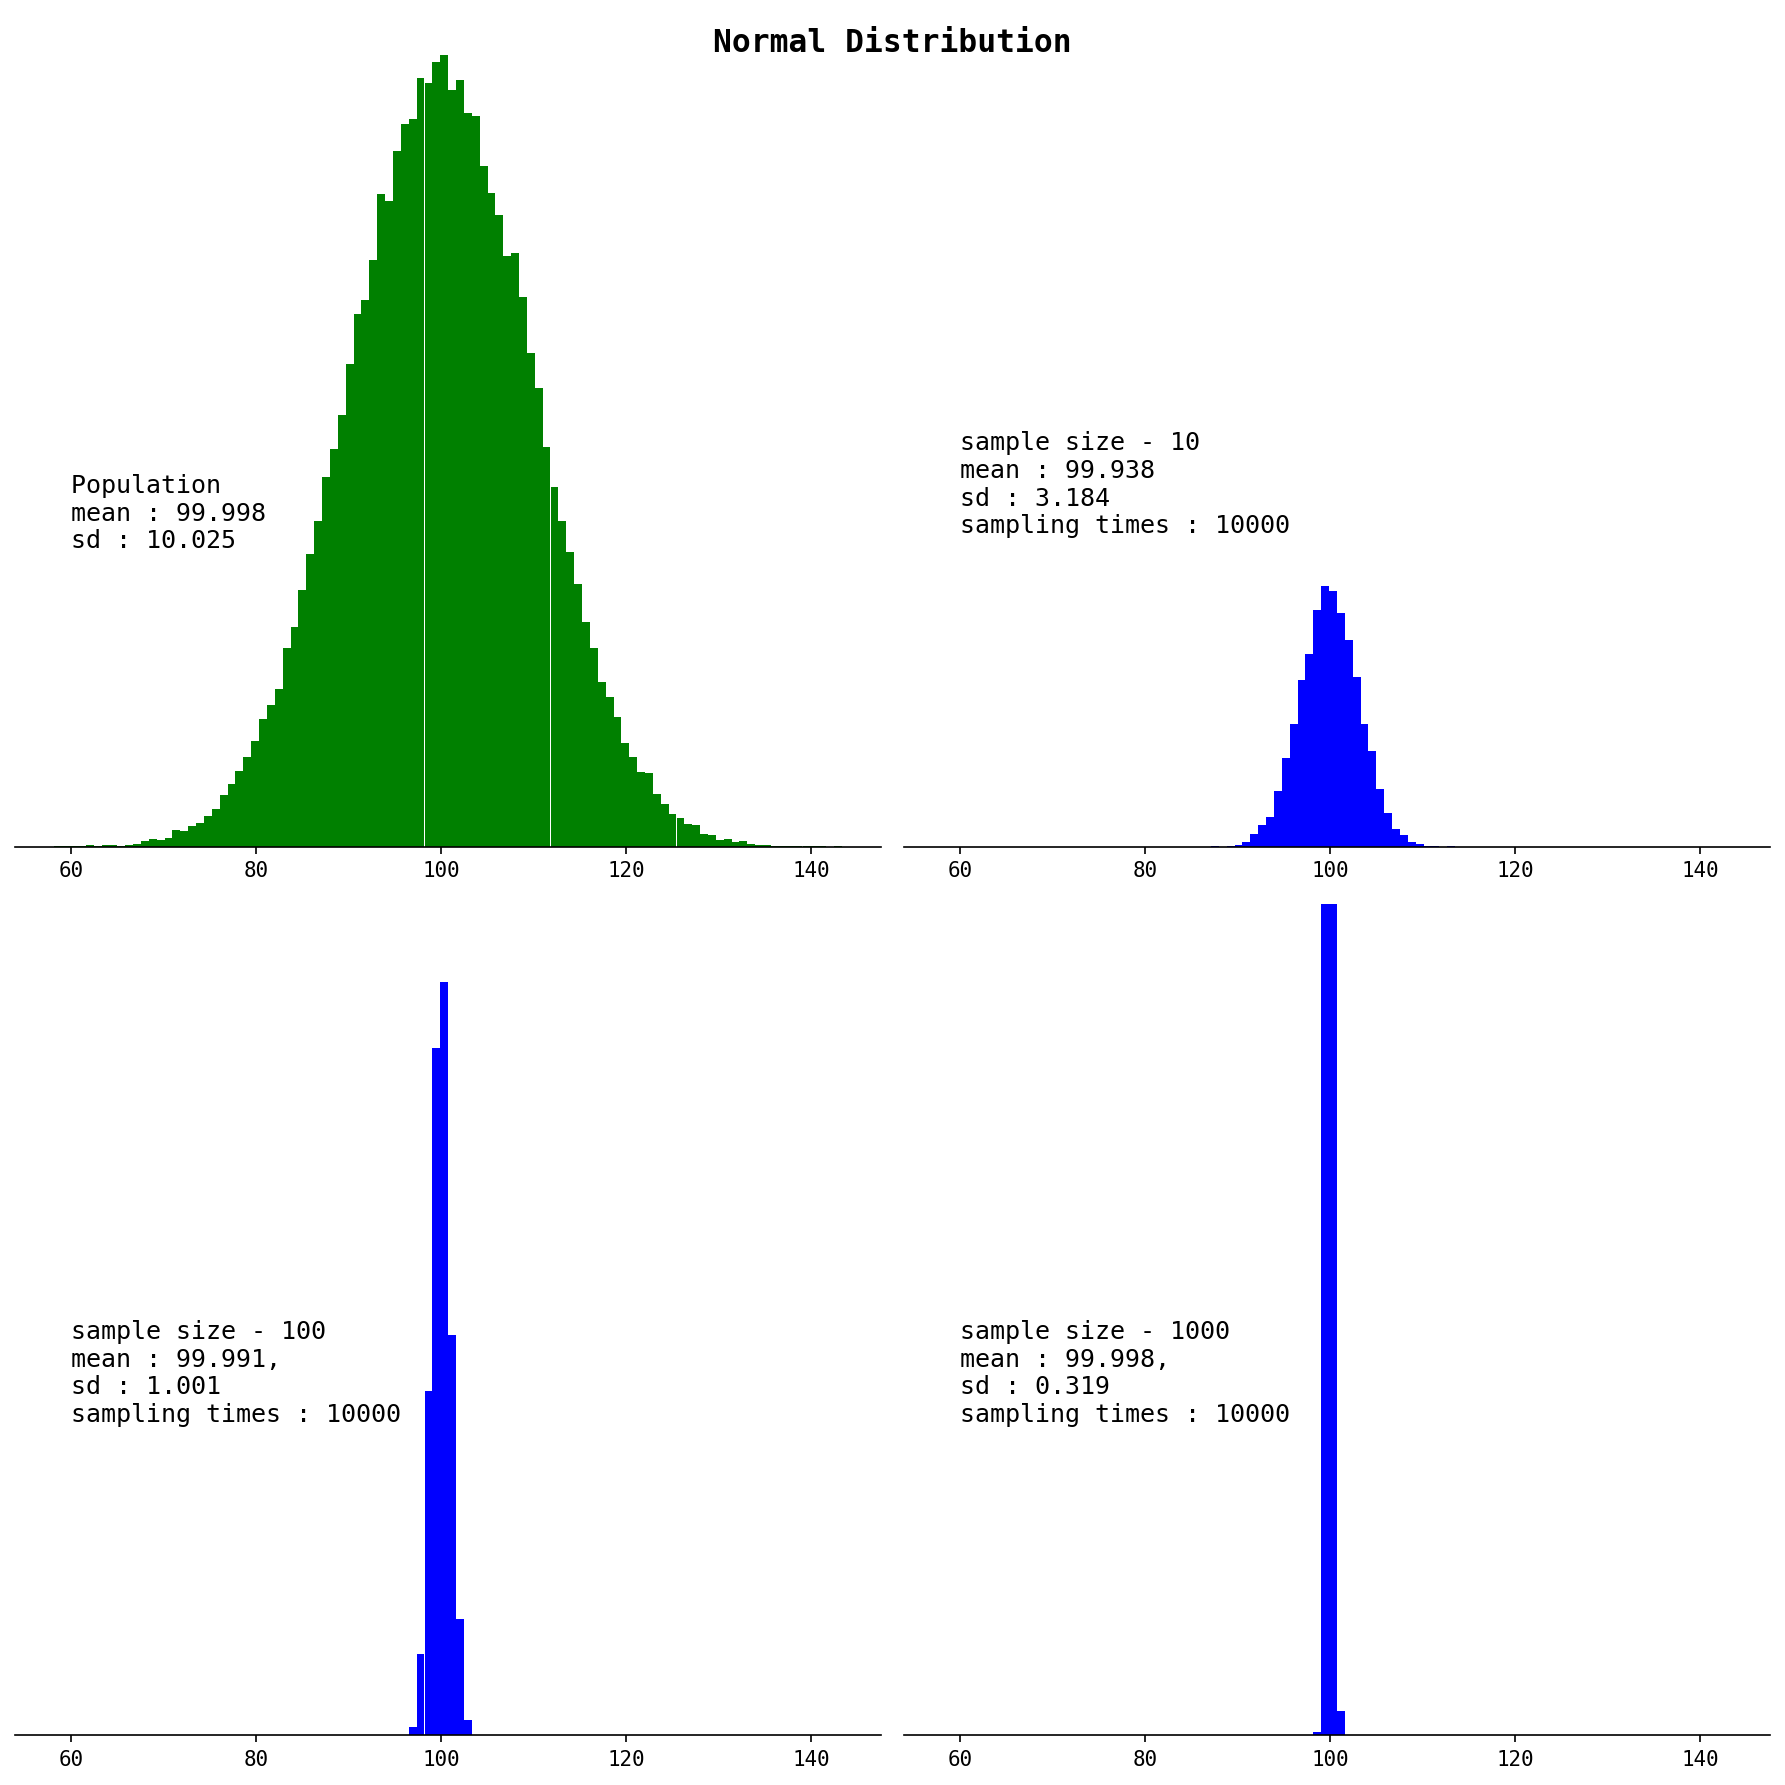

In [ ]:
x = np.random.normal(100, 10, 100000)
normal = sampling(x)
plot_fig(normal, 'Normal Distribution', [60,1300])
plt.savefig('normal.png',dpi=300)

### Gamma Distribution

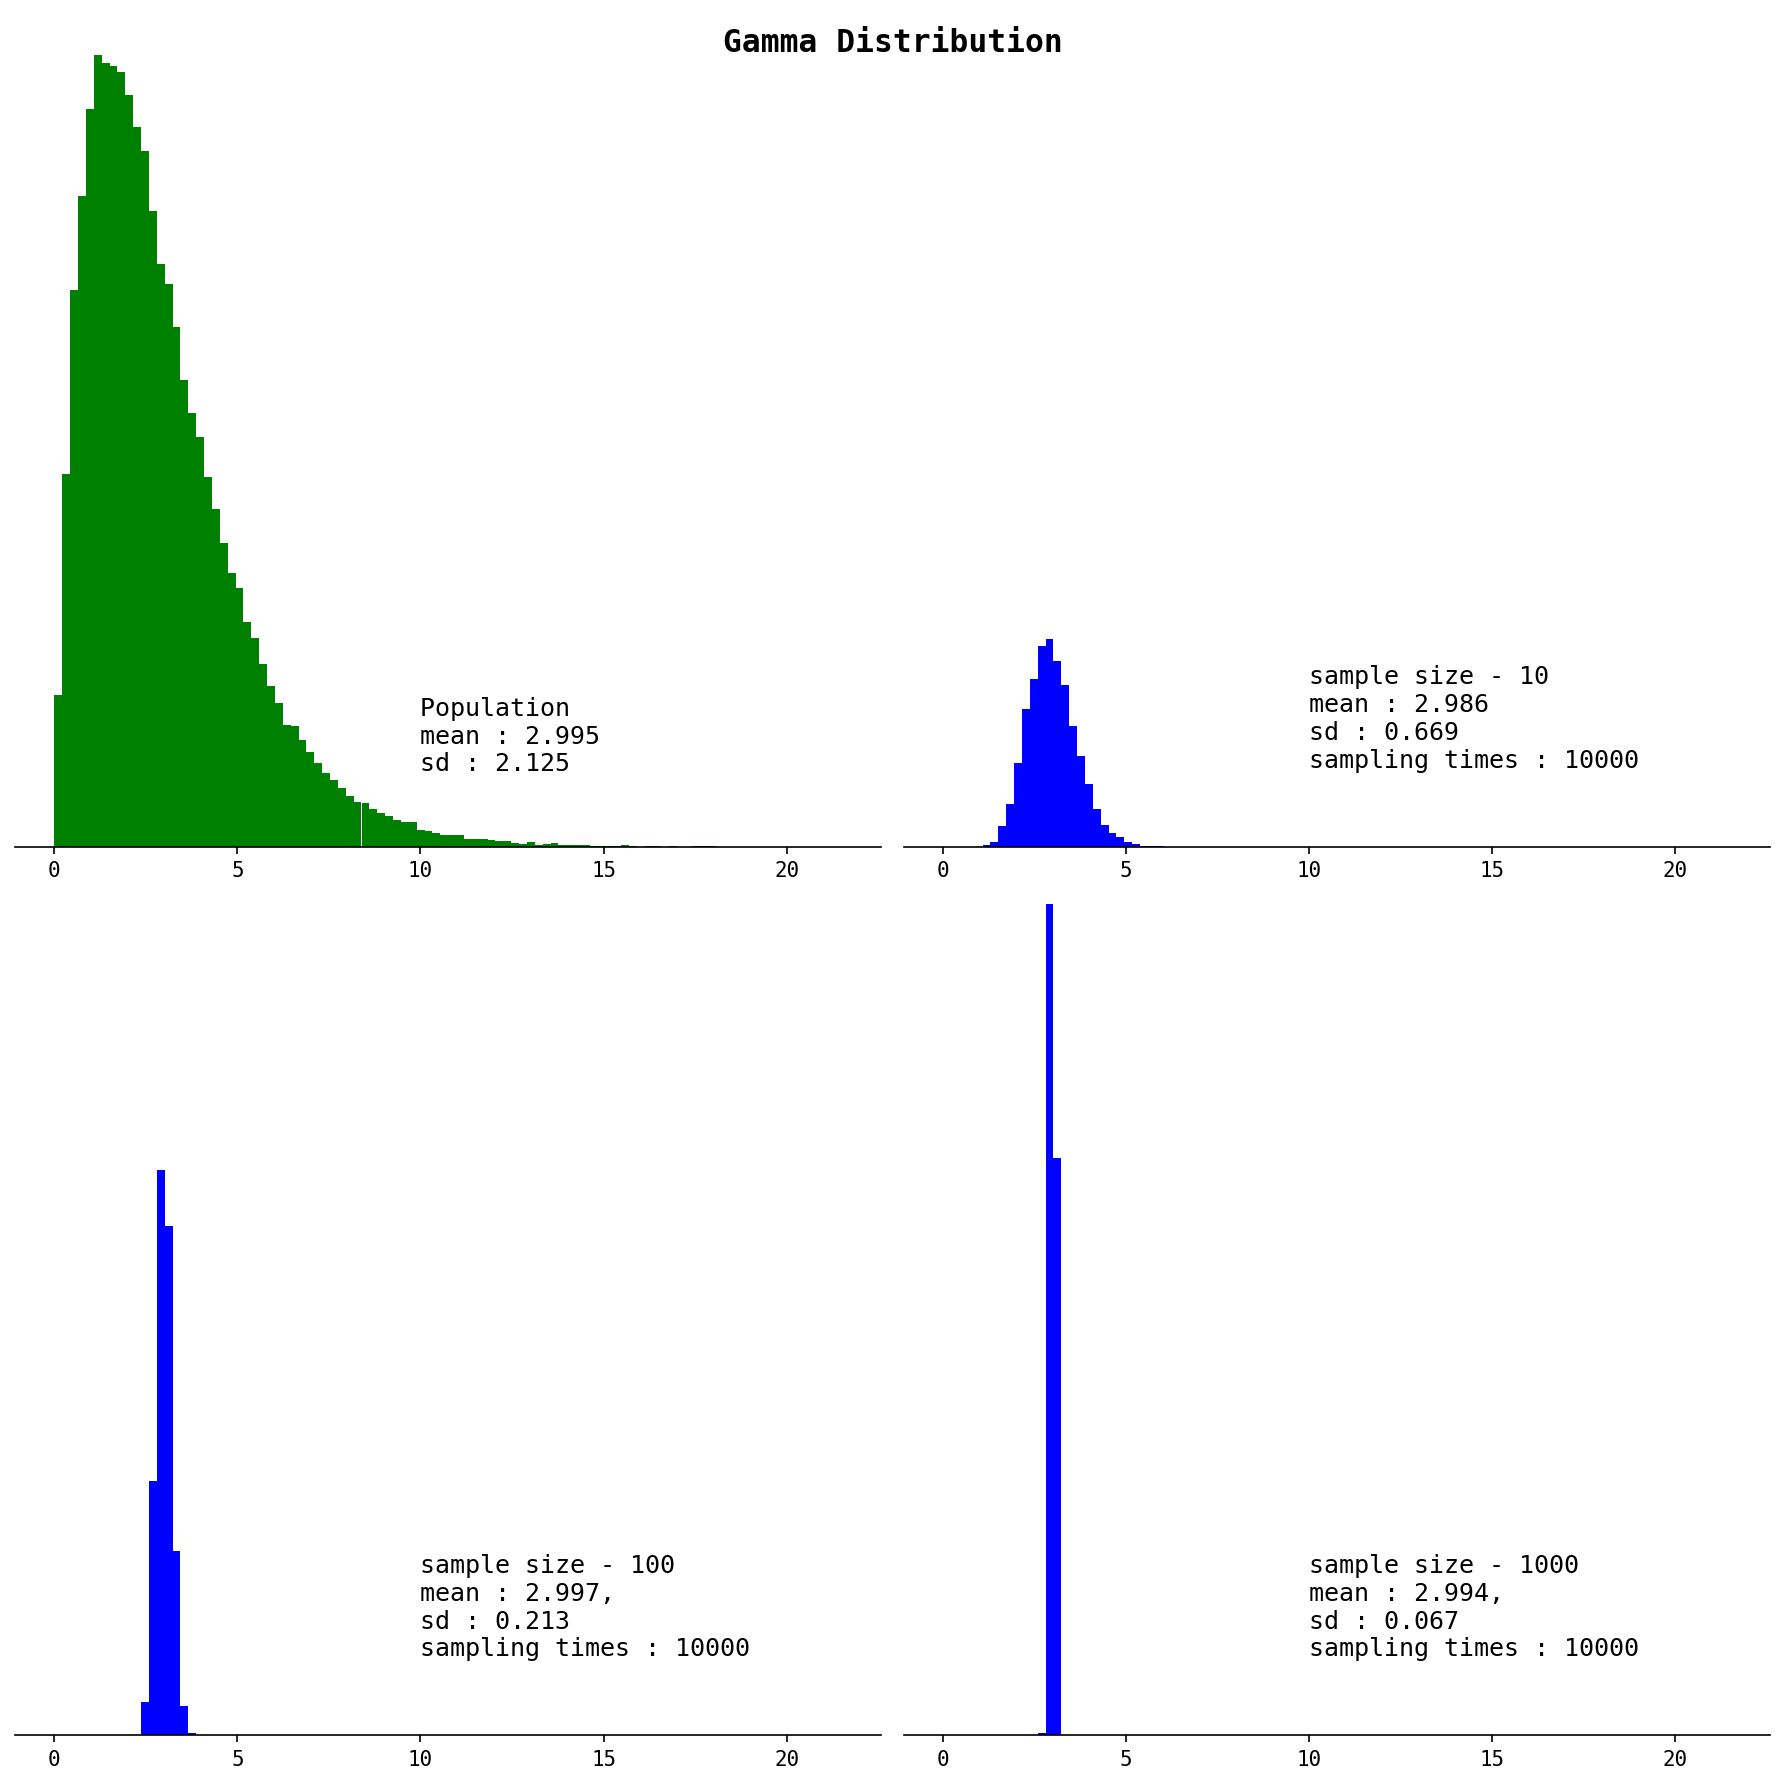

In [ ]:
x2 = np.random.gamma(2, 1.5, 100000)
gamma = sampling(x2)

plot_fig(gamma, 'Gamma Distribution', [10,500])
plt.savefig('gamma_sampling.png',dpi=300)

### Exponential Distribution

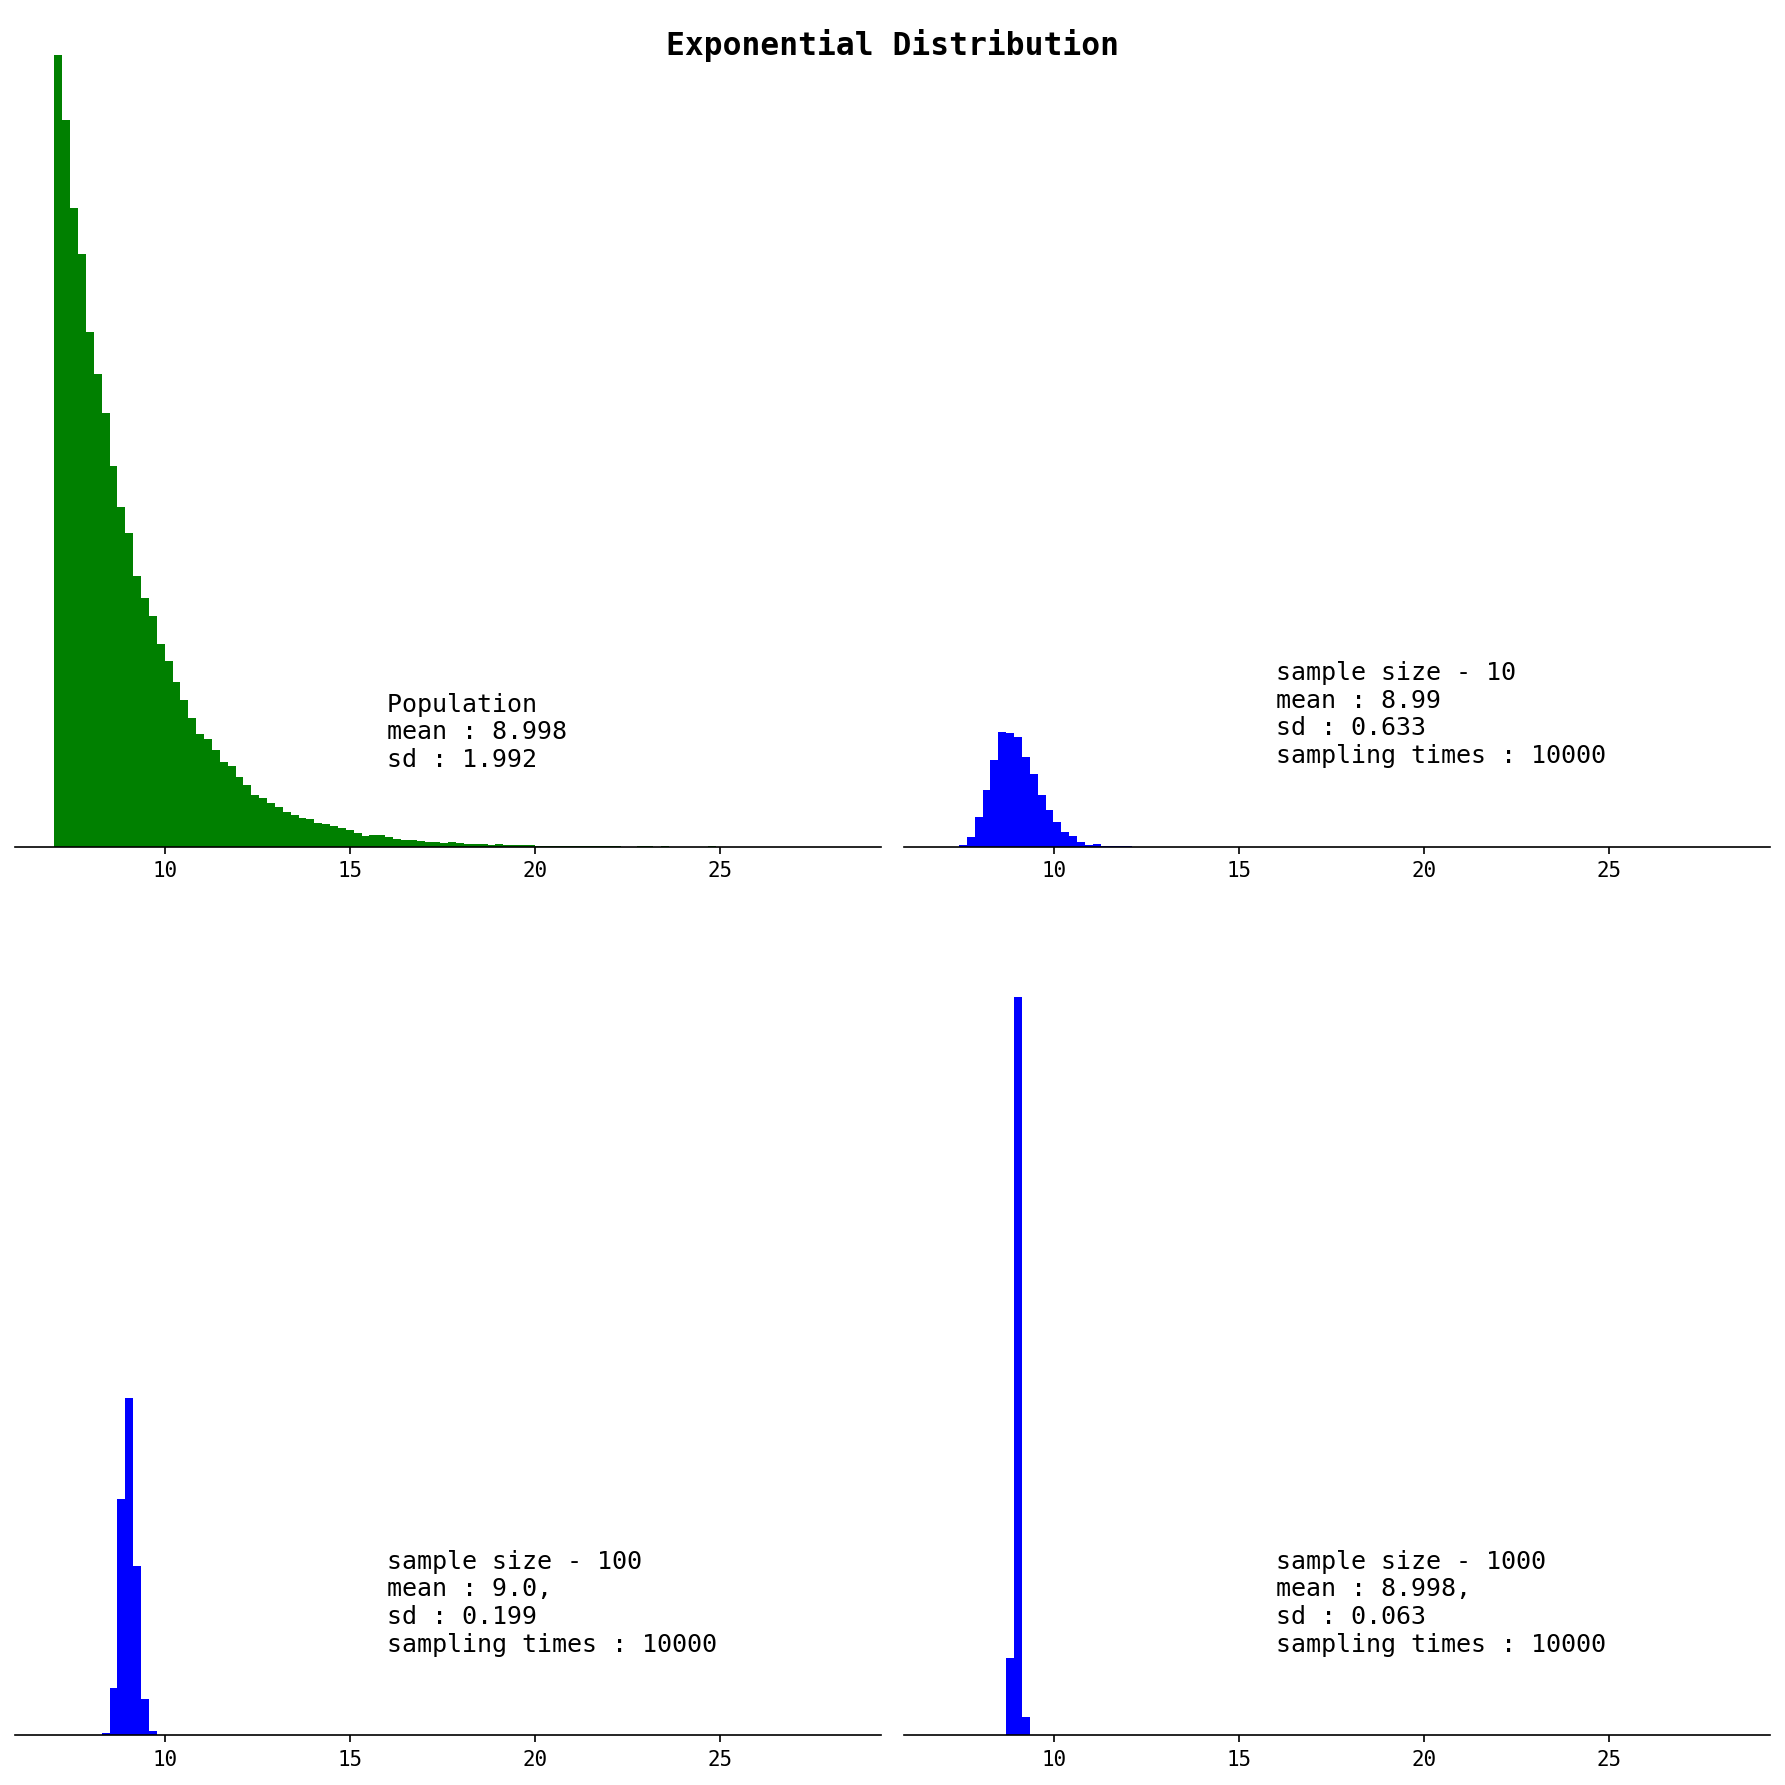

In [ ]:
x = np.random.exponential(2, 100000)+7
exponential = sampling(x)

plot_fig(exponential, 'Exponential Distribution', [16,1000])
plt.savefig('exponential_sampling.png',dpi=300)

### Uniform Distribution

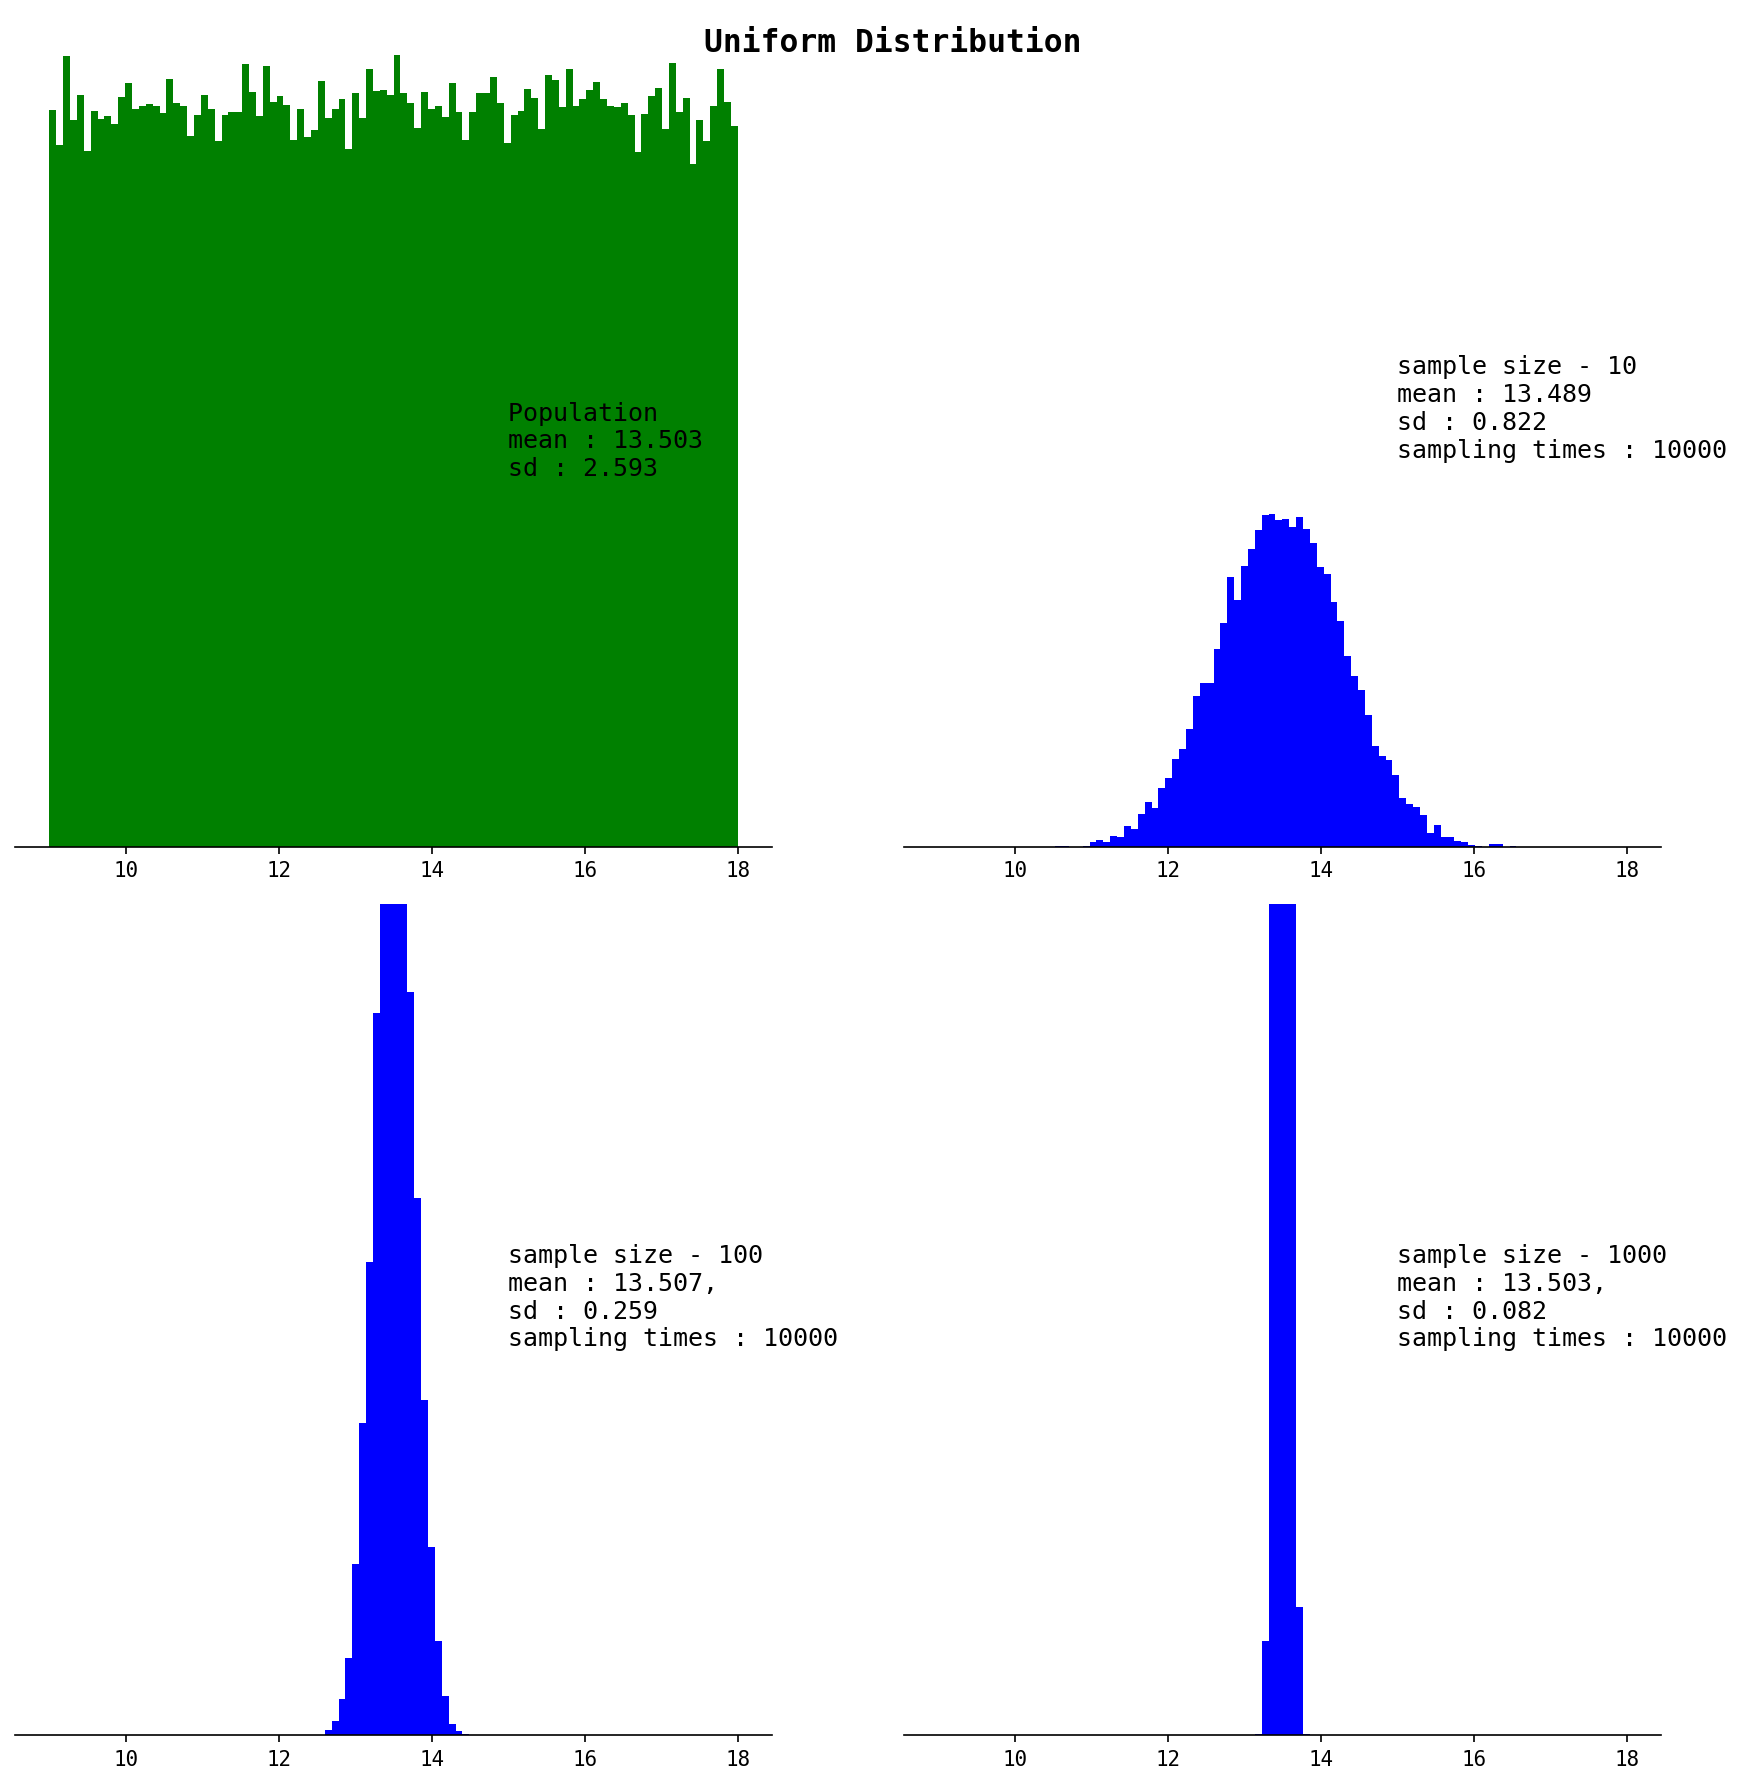

In [ ]:
x = np.random.uniform(9,18, 100000)
uniform = sampling(x)
plot_fig(uniform, 'Uniform Distribution', [15, 500])
plt.savefig('uniform_sampling.png',dpi=300)

## Bootstraping

In [16]:
def bootstraping(data):

  np.random.seed(123)
  bins = np.histogram(data, bins=100)[1]
  max_count = np.max(np.histogram(data, bins=100)[0])
  sample_10_s = np.random.choice(x, size=10)
  sample_100_s = np.random.choice(x, size=100)
  sample_1000_s = np.random.choice(x, size=1000)
  sample_10 = [np.mean(np.random.choice(sample_10_s,10)) for _ in range(10000)]
  sample_100 = [np.mean(np.random.choice(sample_100_s,10)) for _ in range(10000)]
  sample_1000 = [np.mean(np.random.choice(sample_1000_s,10)) for _ in range(10000)]
  average_n = round(np.mean(data),3)
  sd_n = round(np.std(data), 3)
  calc = {'max_count':max_count, 'data':data,'bins':bins, 'sample_10':sample_10, 'sample_100':sample_100,
           'sample_1000':sample_1000, 'average_n':average_n, 'sd_n':sd_n}
  return calc

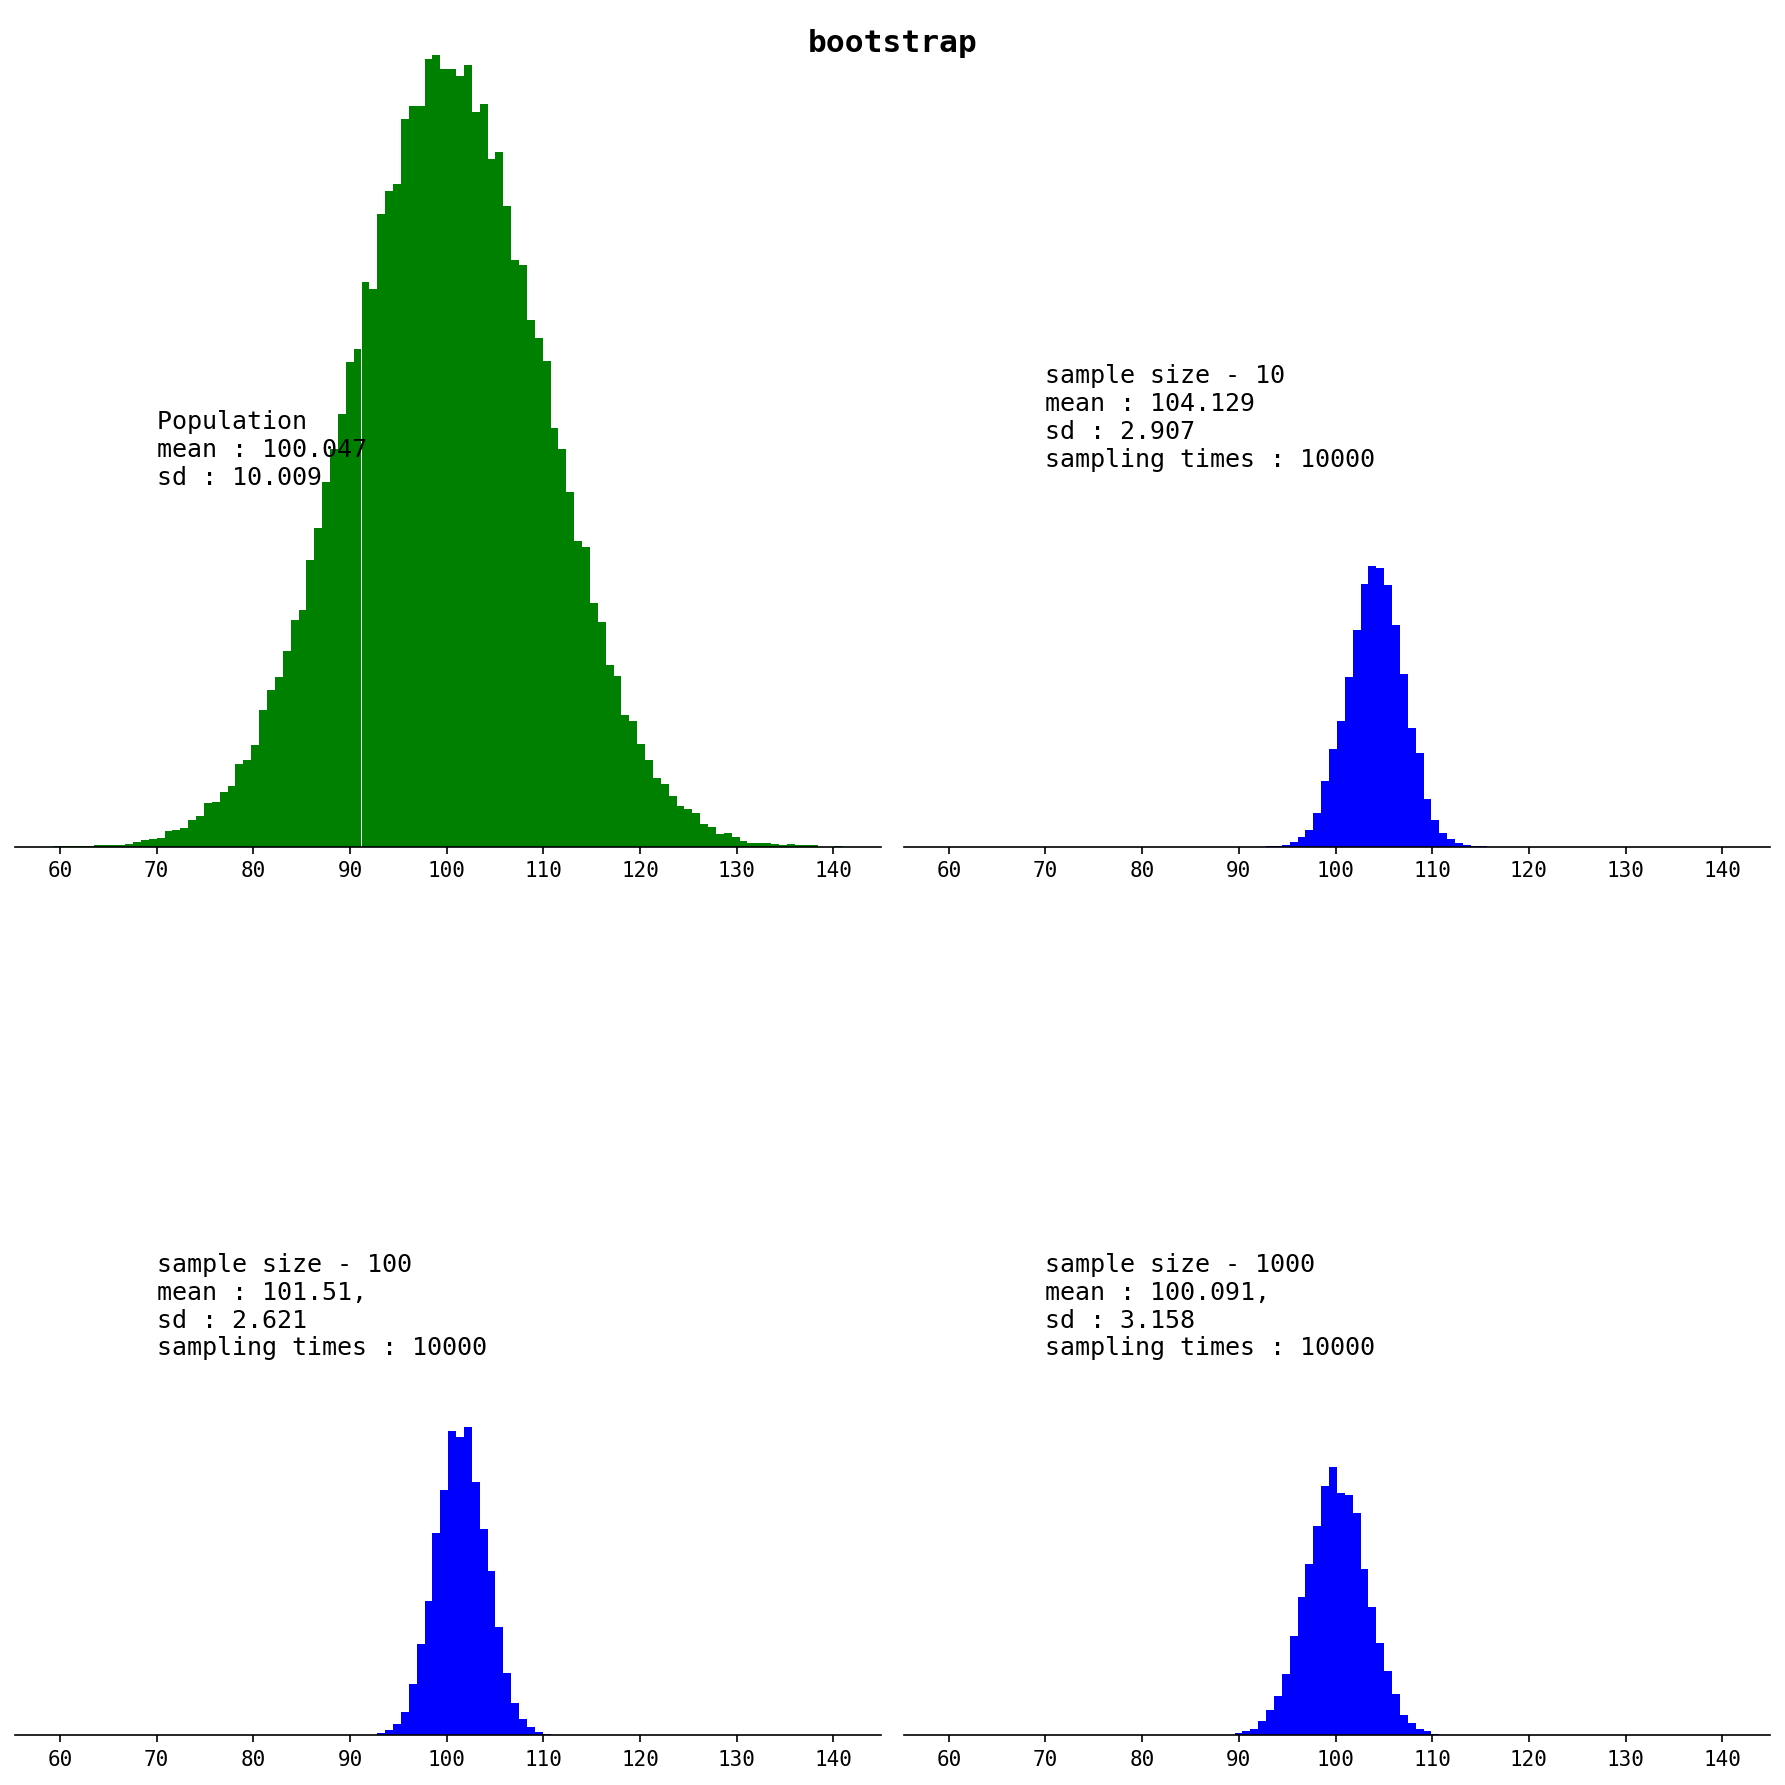

In [23]:
x = np.random.normal(100, 10, 100000)
normal = bootstraping(x)
plot_fig(normal, 'bootstrap',[70,1500])

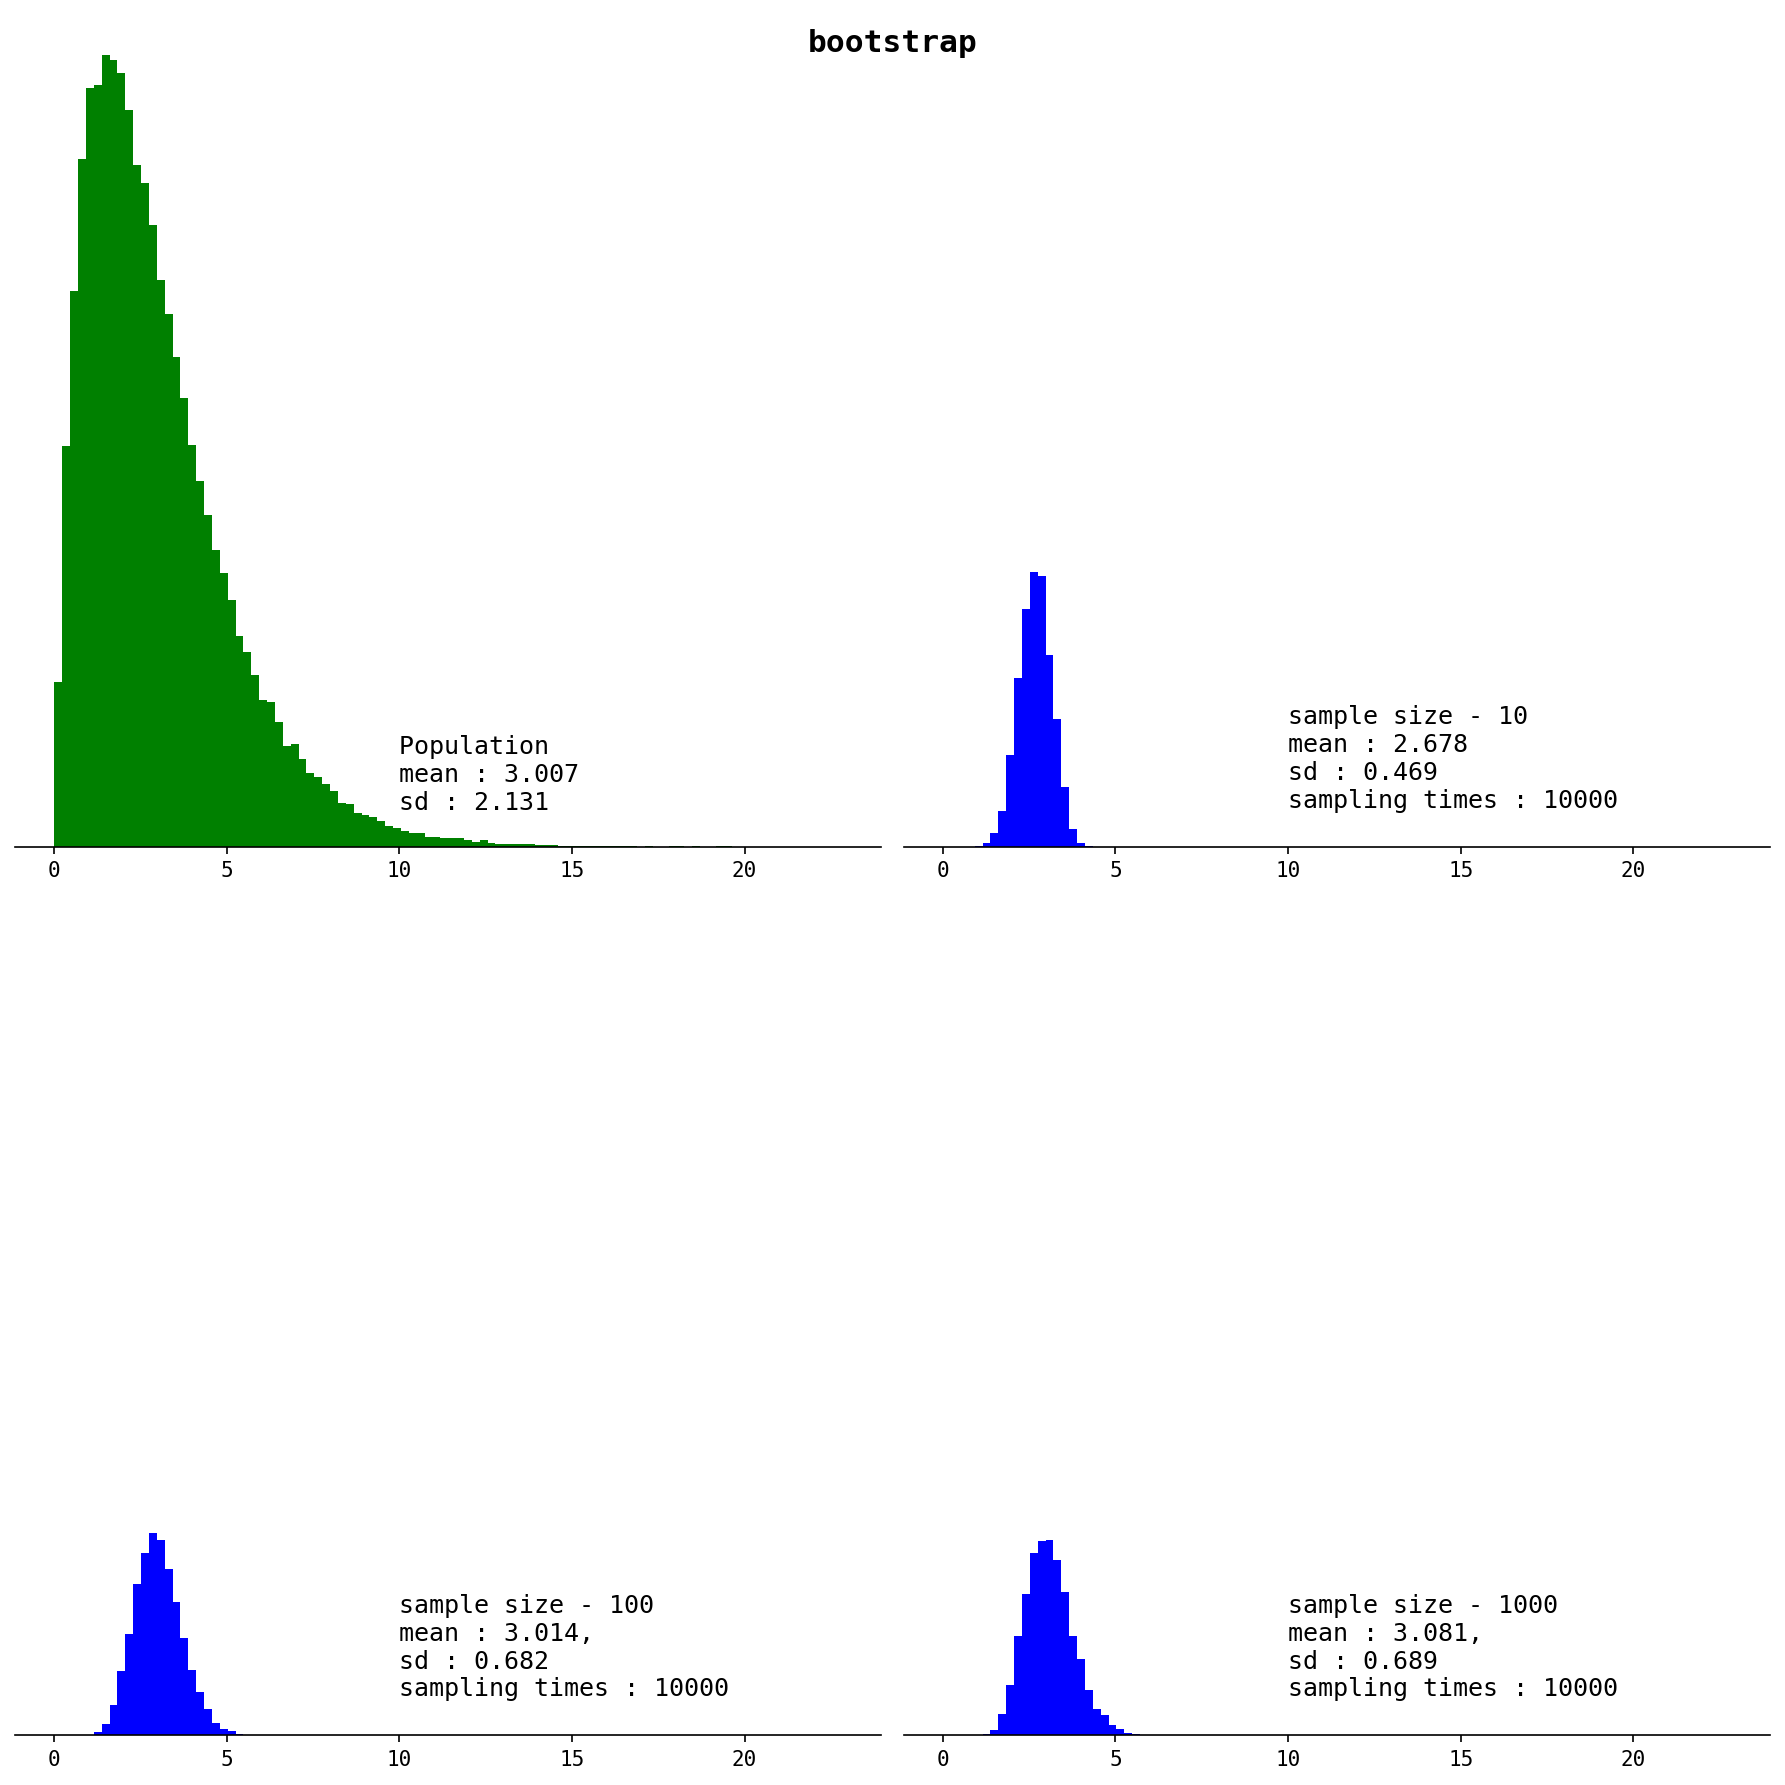

In [21]:
x = np.random.gamma(2, 1.5, 100000)
gamma = bootstraping(x)
plot_fig(gamma, 'bootstrap',[10,260])